In [2]:
import jax.numpy as jnp
import numpy as np
import jax
jax.config.update("jax_enable_x64", True)
from astropy.io import fits
import tqdm
import h5py

from matplotlib import rc
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import cmasher as cm

import load_data as ld
import optimise as opt
import scatters as opt_sc
import init_latents as il
import kfold_cv as kf


In [3]:
file_name = 'korg_grid.h5'
file_path = '../data/'
# Open the file in read mode
with h5py.File(file_path+file_name, 'r+') as f:
    # List the keys (datasets/groups) in the file
    print(f.keys())

    # Access a specific dataset
    apo_id = f['apogee_id']
    spectra = f['spectra']
    suceeded = f['suceeded']

    # Convert the dataset to a NumPy array
    apo_id = apo_id[:]
    spectra = spectra[:]
    suceeded = suceeded[:]

<KeysViewHDF5 ['apogee_id', 'spectra', 'suceeded']>


In [4]:
file_name = '-train-rgbs-new'
spectra_dir_path = '../spec/spectra-reference-stars-APOGEE-giants-ref/'
file_path = '../data/master-APOGEE-giants-train.fits'
spectra_data, label_data = ld.load_data(spectra_dir_path, file_path, file_name)

../spec/spectra-reference-stars-APOGEE-giants-ref/spectra_data-train-rgbs-new.dat
File already exists. Loading spectra data


24it [00:00, 81.57it/s]

Loaded data successfully


In [5]:
n = 4000

train_ID = label_data['ids'][:n]
train_flux = spectra_data['fluxes'][:n]
train_flux_err = spectra_data['fluxes_err'][:n]
train_flux_ivar = spectra_data['fluxes_ivars'][:n]
train_label = label_data['labels'][:n]
train_label_err = label_data['labels_err'][:n]
train_label_ivar = label_data['labels_ivars'][:n]

test_ID = label_data['ids'][n:]
test_flux = spectra_data['fluxes'][n:]
test_flux_err = spectra_data['fluxes_err'][n:]
test_flux_ivar = spectra_data['fluxes_ivars'][n:]
test_label = label_data['labels'][n:]
test_label_err = label_data['labels_err'][n:]
test_label_ivar = label_data['labels_ivars'][n:]

In [6]:
l2reg = 1000
latent_dim = 'P49'
savepath = '../sav/paper/'
name = '_'+str(latent_dim)+'_L2regstrength'+str(l2reg)+'_omega1-train-giantskorg'
alphas = np.load(savepath+'alphas_giants-withscatters'+str(name)+'.npy', allow_pickle=True)
betas = np.load(savepath+'betas_giants-withscatters'+str(name)+'.npy', allow_pickle=True)
zetas = np.load(savepath+'zetas_train_giants-withscatters'+str(name)+'.npy', allow_pickle=True)
ln_noise_fluxes_updated = jnp.log(np.load(savepath+'noise_fluxes_train_giants-withscatters'+str(name)+'.npy', allow_pickle=True))


In [7]:
# first using the fluxes
P = 49
alphas_init_test, betas_init_test, zetas_init_test = il.initialise_alphas_betas_zetas(test_label, test_flux, P)

In [8]:
res_zetas_fromfluxes = opt_sc.get_zetas_test_using_fluxes(test_flux, test_flux_ivar, betas, zetas_init_test, ln_noise_fluxes_updated)
zetas_test_fromfluxes = res_zetas_fromfluxes.params['zetas']

XlaRuntimeError: INTERNAL: Generated function failed: CpuCallback error: Traceback (most recent call last):
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 1043, in launch_instance
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 736, in start
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 195, in start
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 505, in process_one
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 546, in run_cell
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2880, in run_cell
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2935, in _run_cell
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3134, in run_cell_async
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3337, in run_ast_nodes
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
  File "/var/folders/rq/q7l_wtbx4sx5ky0yrvbk7fgh0000gq/T/ipykernel_55089/910535320.py", line 1, in <cell line: 1>
  File "/Users/dhortadarrington/Documents/Projects/the-paton/git/scatters.py", line 403, in get_zetas_test_using_fluxes
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/jaxopt/_src/base.py", line 347, in run
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/jaxopt/_src/implicit_diff.py", line 251, in wrapped_solver_fun
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/jax/_src/traceback_util.py", line 179, in reraise_with_filtered_traceback
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/jax/_src/custom_derivatives.py", line 622, in __call__
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/jax/_src/custom_derivatives.py", line 813, in bind
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/jax/_src/core.py", line 945, in process_custom_vjp_call
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/jax/_src/linear_util.py", line 192, in call_wrapped
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/jaxopt/_src/implicit_diff.py", line 207, in solver_fun_flat
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/jaxopt/_src/base.py", line 309, in _run
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/jax/_src/traceback_util.py", line 179, in reraise_with_filtered_traceback
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/jax/_src/pjit.py", line 327, in cache_miss
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/jax/_src/pjit.py", line 185, in _python_pjit_helper
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/jax/_src/core.py", line 2834, in bind
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/jax/_src/core.py", line 420, in bind_with_trace
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/jax/_src/core.py", line 921, in process_primitive
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/jax/_src/pjit.py", line 1635, in _pjit_call_impl
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/jax/_src/pjit.py", line 1614, in call_impl_cache_miss
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/jax/_src/pjit.py", line 1568, in _pjit_call_impl_python
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/jax/_src/profiler.py", line 335, in wrapper
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/jax/_src/interpreters/pxla.py", line 1244, in __call__
  File "/Users/dhortadarrington/opt/anaconda3/lib/python3.9/site-packages/jax/_src/interpreters/mlir.py", line 2476, in _wrapped_callback
KeyboardInterrupt: 

In [14]:
labels_test_fromflux = zetas_test_fromfluxes @ alphas.T
spectra_test_fromflux = zetas_test_fromfluxes @ betas.T

In [15]:
savepath = '../sav/paper/'
name = '_49_L2regstrength1000_omega1-train-giantskorg'
np.save(savepath+'zetas_test_fromflux_giants-withscatters'+str(name), zetas_test_fromfluxes)
np.save(savepath+'labels_test_fromflux_giants-withscatters'+str(name), labels_test_fromflux)
np.save(savepath+'spectra_test_fromflux_giants-withscatters'+str(name), spectra_test_fromflux)


In [9]:
savepath = '../sav/paper/'
name = '_49_L2regstrength1000_omega1-train-giantskorg'
zetas_test_fromfluxes = np.load(savepath+'zetas_test_fromflux_giants-withscatters'+str(name)+'.npy', allow_pickle=True)
labels_test_fromflux = np.load(savepath+'labels_test_fromflux_giants-withscatters'+str(name)+'.npy', allow_pickle=True)
spectra_test_fromflux = np.load(savepath+'spectra_test_fromflux_giants-withscatters'+str(name)+'.npy', allow_pickle=True)


In [10]:
test_snr = label_data['snr'][4000:]

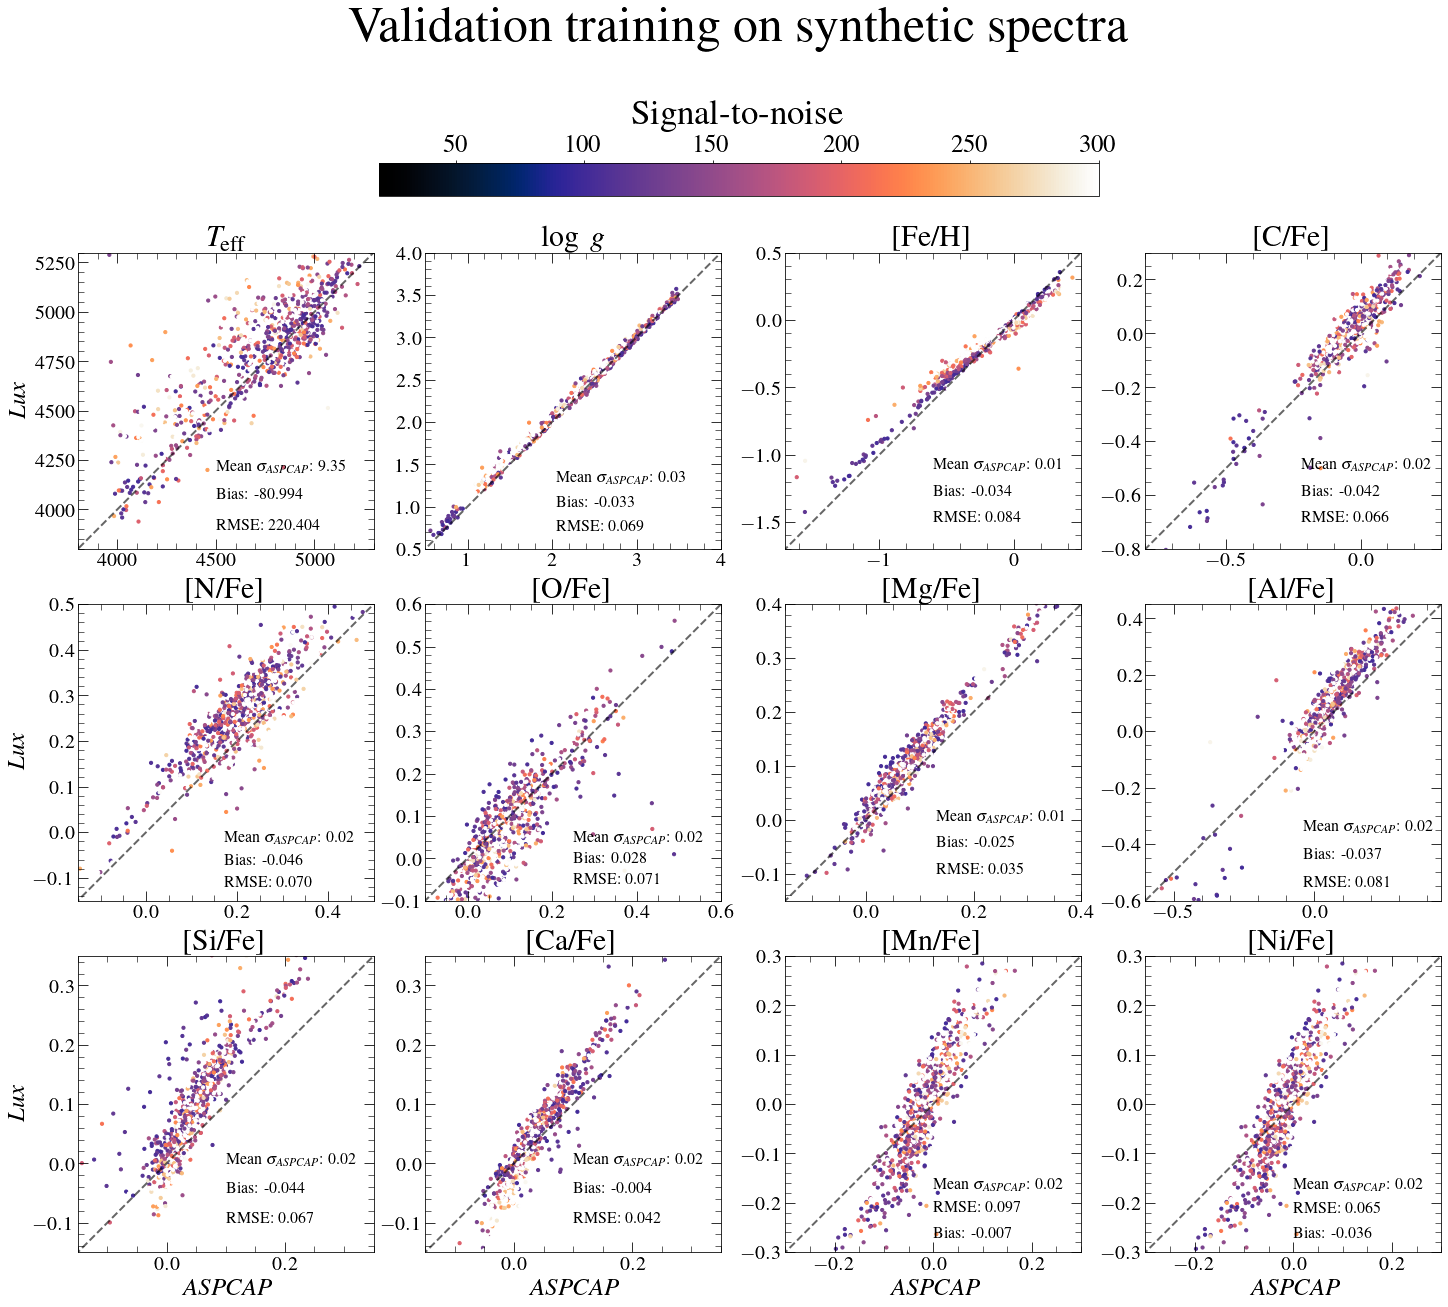

In [15]:
n = 10000
fig = plt.figure(figsize=(20,15), constrained_layout=True)
fig.suptitle('Validation training on synthetic spectra',fontsize=50,x=0.51,y=1.2)

plt.subplot(3,4,1)
plt.title('$T_{\mathrm{eff}}$', fontsize=30)
plt.plot([3500,5500], [3500,5500], color='k',alpha=0.6, lw=2, ls='dashed')
color = plt.scatter(test_label[:n,0], labels_test_fromflux[:,0], c=test_snr, s=10, vmin=20, vmax=300, cmap=cm.torch)
plt.text(4500,3900, 'RMSE: '+str("{:.3f}".format(jnp.sqrt(1./len(test_label)*(jnp.nansum((test_label[:n,0]-labels_test_fromflux[:,0])**2))))), fontsize=16)
plt.text(4500,4050, 'Bias: '+str("{:.3f}".format(jnp.median(test_label[:n,0]-labels_test_fromflux[:,0]))), fontsize=16)
plt.text(4500,4200, 'Mean $\sigma_{ASPCAP}$: '+str("{:.2f}".format(jnp.mean(test_label_err[:n,0]))), fontsize=16)
plt.xlim(3800,5300)
plt.ylim(3800,5300)
plt.ylabel(r'$Lux$', fontsize=25)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,4,2)
plt.title('$\log~g$', fontsize=30)
plt.plot([0,4],[0,4], color='k',alpha=0.6, lw=2, ls='dashed')
plt.text(2.05,0.7, 'RMSE: '+str("{:.3f}".format(jnp.sqrt(1./len(test_label)*(jnp.nansum((test_label[:n,1]-labels_test_fromflux[:,1])**2))))), fontsize=16)
plt.text(2.05,1.0, 'Bias: '+str("{:.3f}".format(jnp.mean(test_label[:n,1]-labels_test_fromflux[:,1]))), fontsize=16)
plt.text(2.05,1.3, 'Mean $\sigma_{ASPCAP}$: '+str("{:.2f}".format(jnp.mean(test_label_err[:n,1]))), fontsize=16)
plt.scatter(test_label[:n,1], labels_test_fromflux[:,1], c=test_snr, s=10, vmin=20, vmax=300, cmap=cm.torch)
plt.xlim(0.5,4)
plt.ylim(0.5,4)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,4,3)
plt.title('[Fe/H]', fontsize=30)
plt.plot([-2,0.5], [-2,0.5], color='k',alpha=0.6, lw=2, ls='dashed')
plt.text(-0.6,-1.5, 'RMSE: '+str("{:.3f}".format(jnp.sqrt(1./len(test_label)*(jnp.nansum((test_label[:n,2]-labels_test_fromflux[:,2])**2))))), fontsize=16)
plt.text(-0.6,-1.3, 'Bias: '+str("{:.3f}".format(jnp.mean(test_label[:n,2]-labels_test_fromflux[:,2]))), fontsize=16)
plt.text(-0.6,-1.1, 'Mean $\sigma_{ASPCAP}$: '+str("{:.2f}".format(jnp.mean(test_label_err[:n,2]))), fontsize=16)
plt.scatter(test_label[:n,2], labels_test_fromflux[:,2], c=test_snr, s=10, vmin=20, vmax=300, cmap=cm.torch)
plt.xlim(-1.7,0.5)
plt.ylim(-1.7,0.5)
# plt.ylabel(r'The Paton', fontsize=20)
# plt.xlabel(r'ASPCAP', fontsize=20)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,4,4)
plt.title('[C/Fe]', fontsize=30)
mask = (np.abs(labels_test_fromflux[:,3])<1)&(np.abs(test_label[:,3])<1)&((test_label[:,3]<-0.10184103)|(test_label[:,3]>-0.10184101))
plt.plot([-1,1], [-1,1], color='k',alpha=0.6, lw=2, ls='dashed')
plt.text(-0.22,-0.7, 'RMSE: '+str("{:.3f}".format(jnp.sqrt(1./len(test_label)*(jnp.nansum((test_label[:n,3]-labels_test_fromflux[:,3])**2))))), fontsize=16)
plt.text(-0.22,-0.6, 'Bias: '+str("{:.3f}".format(jnp.mean(test_label[:n,3]-labels_test_fromflux[:,3]))), fontsize=16)
plt.text(-0.22,-0.5, 'Mean $\sigma_{ASPCAP}$: '+str("{:.2f}".format(jnp.mean(test_label_err[:n,3]))), fontsize=16)
plt.scatter(test_label[:n,3][mask], labels_test_fromflux[:,3][mask], c=test_snr[mask], s=10, vmin=20, vmax=300, cmap=cm.torch)
plt.xlim(-0.8,0.3)
plt.ylim(-0.8,0.3)
# plt.xlabel(r'ASPCAP', fontsize=20)
# plt.ylabel(r'The Paton', fontsize=20)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,4,5)
plt.title('[N/Fe]', fontsize=30)
mask = (np.abs(labels_test_fromflux[:,4])<1)&(np.abs(test_label[:,4])<1)&(np.abs(test_label_err[:n,4])<1)
plt.plot([-0.5,1.], [-0.5,1.], color='k',alpha=0.6, lw=2, ls='dashed')
plt.text(0.17,-0.12, 'RMSE: '+str("{:.3f}".format(jnp.sqrt(1./len(test_label[mask])*(jnp.nansum((test_label[:n,4][mask]-labels_test_fromflux[:,4][mask])**2))))), fontsize=16)
plt.text(0.17,-0.07, 'Bias: '+str("{:.3f}".format(jnp.mean(test_label[:n,4][mask]-labels_test_fromflux[:,4][mask]))), fontsize=16)
plt.text(0.17,-0.02, 'Mean $\sigma_{ASPCAP}$: '+str("{:.2f}".format(jnp.mean(test_label_err[:n,4][mask]))), fontsize=16)
plt.scatter(test_label[:n,4][mask], labels_test_fromflux[:,4][mask], c=test_snr[mask], s=10, vmin=20, vmax=300, cmap=cm.torch)
plt.xlim(-0.15,0.5)
plt.ylim(-0.15,0.5)
plt.ylabel(r'$Lux$', fontsize=25)
# plt.xlabel(r'ASPCAP', fontsize=20)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,4,6)
plt.title('[O/Fe]', fontsize=30)
mask = (np.abs(labels_test_fromflux[:,5])<1)&(np.abs(test_label_err[:n,5])<1)
plt.plot([-0.6,0.6], [-0.6,0.6], color='k',alpha=0.6, lw=2, ls='dashed')
plt.text(0.25,-0.06, 'RMSE: '+str("{:.3f}".format(jnp.sqrt(1./len(test_label[mask])*(jnp.nansum((test_label[:n,5][mask]-labels_test_fromflux[:,5][mask])**2))))), fontsize=16)
plt.text(0.25,-0.01, 'Bias: '+str("{:.3f}".format(jnp.mean(test_label[:n,5][mask]-labels_test_fromflux[:,5][mask]))), fontsize=16)
plt.text(0.25,0.04, 'Mean $\sigma_{ASPCAP}$: '+str("{:.2f}".format(jnp.mean(test_label_err[:n,5][mask]))), fontsize=16)
plt.scatter(test_label[:n,5][mask], labels_test_fromflux[:,5][mask], c=test_snr[mask], s=10, vmin=20, vmax=300, cmap=cm.torch)
plt.xlim(-0.1,0.6)
plt.ylim(-0.1,0.6)
# plt.xlabel(r'ASPCAP', fontsize=20)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,4,7)
plt.title('[Mg/Fe]', fontsize=30)
plt.plot([-0.6,0.6], [-0.6,0.6], color='k',alpha=0.6, lw=2, ls='dashed')
plt.text(0.13,-0.1, 'RMSE: '+str("{:.3f}".format(jnp.sqrt(1./len(test_label)*(jnp.nansum((test_label[:n,6]-labels_test_fromflux[:,6])**2))))), fontsize=16)
plt.text(0.13,-0.05, 'Bias: '+str("{:.3f}".format(jnp.mean(test_label[:n,6]-labels_test_fromflux[:,6]))), fontsize=16)
plt.text(0.13,0., 'Mean $\sigma_{ASPCAP}$: '+str("{:.2f}".format(jnp.mean(test_label_err[:n,6]))), fontsize=16)
plt.scatter(test_label[:n,6], labels_test_fromflux[:,6], c=test_snr, s=10, vmin=20, vmax=300, cmap=cm.torch)
plt.xlim(-0.15,0.4)
plt.ylim(-0.15,0.4)
# plt.ylabel(r'The Paton', fontsize=20)
# plt.xlabel(r'ASPCAP', fontsize=20)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,4,8)
plt.title('[Al/Fe]', fontsize=30)
mask = (np.abs(labels_test_fromflux[:,7])<1) &(np.abs(test_label[:,7])<1) & ((test_label[:,7]>0.144312554)|(test_label[:,7]<0.144312552))\
    &(np.abs(test_label_err[:n,7])<1)
plt.plot([-0.6,0.6], [-0.6,0.6], color='k',alpha=0.6, lw=2, ls='dashed')
plt.text(-0.04,-0.55, 'RMSE: '+str("{:.3f}".format(jnp.sqrt(1./len(test_label[mask])*(jnp.nansum((test_label[:n,7][mask]-labels_test_fromflux[:,7][mask])**2))))), fontsize=16)
plt.text(-0.04,-0.45, 'Bias: '+str("{:.3f}".format(jnp.mean(test_label[:n,7][mask]-labels_test_fromflux[:,7][mask]))), fontsize=16)
plt.text(-0.04,-0.35, 'Mean $\sigma_{ASPCAP}$: '+str("{:.2f}".format(jnp.mean(test_label_err[:n,7][mask]))), fontsize=16)
plt.scatter(test_label[:n,7][mask], labels_test_fromflux[:,7][mask], c=test_snr[mask], s=10, vmin=20, vmax=300, cmap=cm.torch)
plt.xlim(-0.6,0.45)
plt.ylim(-0.6,0.45)
# plt.ylabel(r'The Paton', fontsize=20)
# plt.xlabel(r'ASPCAP', fontsize=20)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,4,9)
plt.title('[Si/Fe]', fontsize=30)
mask = (np.abs(labels_test_fromflux[:,8])<1)&(np.abs(test_label_err[:n,8])<1)
plt.plot([-0.6,0.6], [-0.6,0.6], color='k',alpha=0.6, lw=2, ls='dashed')
plt.text(0.1,-0.1, 'RMSE: '+str("{:.3f}".format(jnp.sqrt(1./len(test_label)*(jnp.nansum((test_label[:n,8]-labels_test_fromflux[:,8])**2))))), fontsize=16)
plt.text(0.1,-0.05, 'Bias: '+str("{:.3f}".format(jnp.mean(test_label[:n,8]-labels_test_fromflux[:,8]))), fontsize=16)
plt.text(0.1,0.0, 'Mean $\sigma_{ASPCAP}$: '+str("{:.2f}".format(jnp.mean(test_label_err[:n,8]))), fontsize=16)
plt.scatter(test_label[:n,8][mask], labels_test_fromflux[:,8][mask], c=test_snr[mask], s=10, vmin=20, vmax=300, cmap=cm.torch)
plt.xlim(-0.15,0.35)
plt.ylim(-0.15,0.35)
plt.ylabel(r'$Lux$', fontsize=25)
plt.xlabel(r'$ASPCAP$', fontsize=25)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()


plt.subplot(3,4,10)
plt.title('[Ca/Fe]', fontsize=30)
mask = (np.abs(labels_test_fromflux[:,9])<1)&(np.abs(test_label_err[:n,9])<1)
plt.plot([-0.6,0.9], [-0.6,0.9], color='k',alpha=0.6, lw=2, ls='dashed')
plt.text(0.1,-0.1, 'RMSE: '+str("{:.3f}".format(jnp.sqrt(1./len(test_label)*(jnp.nansum((test_label[:n,9]-labels_test_fromflux[:,9])**2))))), fontsize=16)
plt.text(0.1,-0.05, 'Bias: '+str("{:.3f}".format(jnp.mean(test_label[:n,9]-labels_test_fromflux[:,9]))), fontsize=16)
plt.text(0.1,0., 'Mean $\sigma_{ASPCAP}$: '+str("{:.2f}".format(jnp.mean(test_label_err[:n,9][np.abs(test_label_err[:n,9])<1]))), fontsize=16)
plt.scatter(test_label[:n,9][mask], labels_test_fromflux[:,9][mask], c=test_snr[mask], s=10, vmin=20, vmax=300, cmap=cm.torch)
plt.xlim(-0.15,0.35)
plt.ylim(-0.15,0.35)
# plt.ylabel(r'The Paton', fontsize=25)
plt.xlabel(r'$ASPCAP$', fontsize=25)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,4,11)
plt.title('[Mn/Fe]', fontsize=30)
mask = (np.abs(labels_test_fromflux[:,10])<1) &(np.abs(test_label[:,10])<1) & ((test_label[:,10]>0.144312554)|(test_label[:,10]<0.144312552))\
&(np.abs(test_label_err[:n,10])<1)
plt.plot([-0.6,0.9], [-0.6,0.9], color='k',alpha=0.6, lw=2, ls='dashed')
plt.text(-0.,-0.22, 'RMSE: '+str("{:.3f}".format(jnp.sqrt(1./len(test_label)*(jnp.nansum((test_label[:n,10]-labels_test_fromflux[:,10])**2))))), fontsize=16)
plt.text(-0.,-0.27, 'Bias: '+str("{:.3f}".format(jnp.mean(test_label[:n,10]-labels_test_fromflux[:,10]))), fontsize=16)
plt.text(0.,-0.17, 'Mean $\sigma_{ASPCAP}$: '+str("{:.2f}".format(jnp.mean(test_label_err[:n,10][mask]))), fontsize=16)
plt.scatter(test_label[:n,10][mask], labels_test_fromflux[:,10][mask], c=test_snr[mask], s=10, vmin=20, vmax=300, cmap=cm.torch)
plt.xlim(-0.3,0.3)
plt.ylim(-0.3,0.3)
# plt.ylabel(r'The Paton', fontsize=20)
plt.xlabel(r'$ASPCAP$', fontsize=25)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(3,4,12)
plt.title('[Ni/Fe]', fontsize=30)
mask = (np.abs(labels_test_fromflux[:,10])<1) &(np.abs(test_label[:,10])<1) & ((test_label[:,10]>0.144312554)|(test_label[:,10]<0.144312552))\
&(np.abs(test_label_err[:n,10])<1)
plt.plot([-0.6,0.9], [-0.6,0.9], color='k',alpha=0.6, lw=2, ls='dashed')
plt.text(0.,-0.22, 'RMSE: '+str("{:.3f}".format(jnp.sqrt(1./len(test_label)*(jnp.nansum((test_label[:n,11]-labels_test_fromflux[:,11])**2))))), fontsize=16)
plt.text(0.,-0.27, 'Bias: '+str("{:.3f}".format(jnp.mean(test_label[:n,11]-labels_test_fromflux[:,11]))), fontsize=16)
plt.text(0.,-0.17, 'Mean $\sigma_{ASPCAP}$: '+str("{:.2f}".format(jnp.mean(test_label_err[:n,10][mask]))), fontsize=16)
plt.scatter(test_label[:n,10][mask], labels_test_fromflux[:,10][mask], c=test_snr[mask], s=10, vmin=20, vmax=300, cmap=cm.torch)
plt.xlim(-0.3,0.3)
plt.ylim(-0.3,0.3)
# plt.ylabel(r'The Paton', fontsize=20)
plt.xlabel(r'$ASPCAP$', fontsize=25)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

cbar_ax = fig.add_axes([0.26, 1.025, 0.5,0.03])
cb = plt.colorbar(cax = cbar_ax,orientation='horizontal')
cb.set_label(label=r'Signal-to-noise',fontsize=35,labelpad=10)
cb.ax.tick_params(labelsize=25)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

plt.savefig('../plots/paper/CV-test-korg-lux.pdf',dpi=200, bbox_inches = 'tight')